# Sprint 機械学習スクラッチ SVM

## Sprintの目的
- スクラッチを通してSVMを理解する
- 線形モデルと異なる手法に触れる

## どのように学ぶか
- スクラッチでSVMを実装した後、学習と検証を行なっていきます。

## 2.SVMスクラッチ

分類のためのサポートベクターマシン（SVM、サポートベクトルマシン）のクラスをスクラッチで作成していきます。NumPyなど最低限のライブラリのみを使いアルゴリズムを実装していきます。


SVMには学習時に分類の間違いを認めるソフトマージンSVMと、認めないハードマージンSVMがありますが、ここでは実装が単純なハードマージンSVMを扱います。


以下に雛形を用意してあります。このScratchSVMClassifierクラスにコードを書き加えていってください。


### 雛形

```
class ScratchSVMClassifier():
    """
    SVM分類器のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    kernel : str
      カーネルの種類。線形カーネル（linear）か多項式カーネル（polly）
    threshold : float
      サポートベクターを選ぶための閾値
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.n_support_vectors : int
      サポートベクターの数
    self.index_support_vectors : 次の形のndarray, shape (n_support_vectors,)
      サポートベクターのインデックス
    self.X_sv :  次の形のndarray, shape(n_support_vectors, n_features)
      サポートベクターの特徴量
    self.lam_sv :  次の形のndarray, shape(n_support_vectors, 1)
      サポートベクターの未定乗数
    self.y_sv :  次の形のndarray, shape(n_support_vectors, 1)
      サポートベクターのラベル

    """
    def __init__(self, num_iter, lr, kernel='linear', threshold=1e-5, verbose=False):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.kernel = kernel
        self.threshold = threshold
        self.verbose = verbose
    def fit(self, X, y, X_val=None, y_val=None):
        """
        SVM分類器を学習する。検証データが入力された場合はそれに対する精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
        pass
    def predict(self, X):
        """
        SVM分類器を使いラベルを推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            SVM分類器による推定結果
        """
        pass
        return
```

In [1]:
# ライブラリインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from sklearn.datasets import load_iris
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 【まとめ】最終コード

In [2]:
class ScratchSVMClassifier():
    """
    SVM分類器のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    kernel : str
      カーネルの種類。線形カーネル（linear）か多項式カーネル（polly）
    threshold : float
      サポートベクターを選ぶための閾値
    verbose : bool
      学習過程を出力する場合はTrue
    params : dict
      多項式カーネル関数使用時のパラメータ
    verbose_filter : int
      学習過程出力の表示インターバルを指定

    Attributes
    ----------
    self.lag_lambda : 初期値None
      ラグランジュ未定乗数
    self.support_vector :  次の形のndarray, shape(n_support_vectors, n_features)
      サポートベクターの特徴量
    self.support_vector_lambda :  次の形のndarray, shape(n_support_vectors, 1)
      サポートベクターの未定乗数
    self.support_vector_y :  次の形のndarray, shape(n_support_vectors, 1)
      サポートベクターのラベル
    self.p_gamma : float
      多項式カーネル関数のγの値
    self.p_theta : float
      多項式カーネル関数のθの値
    self.p_d : float
      多項式カーネル関数のdの値
    """
    def __init__(self, num_iter, lr=0.1, kernel='linear', threshold=1e-5, verbose=False, params={'g':1.0, 't':0.0, 'd':1.0}, q=0, verbose_filter=1):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.kernel = kernel
        self.threshold = threshold
        self.verbose = verbose
        
        # 多項式カーネル関数のパラメータ設定
        if self.kernel == 'polly':
            self.p_gamma = params['g']
            self.p_theta = params['t']
            self.p_d = params['d']
        
        # 課題提出用
        self.q = q
        self.verbose_filter = verbose_filter
        
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        SVM分類器を学習する。検証データが入力された場合はそれに対する精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        # インスタンス変数
        self.X_samples = X.shape[0]         # Xの行数
        self.X_featurs = X.shape[1]         # Xの列数
        self.lag_lambda = None             # ラグランジュ乗数ラムダの初期化
        self.support_vector = None         # サポートベクター
        self.support_vector_lambda = None  # サポートベクターのラグランジュ乗数
        self.support_vector_y = None       # サポートベクターのyラベル
        self.loop_count = 0
        
        # yの値を置換
        y = self._y_change(y)
        
        
        # メイン処理
        for i in range(self.iter):
            self.loop_count = i
            # 問題1 - ラグランジュ未定乗数法
            self.lag_lambda = self._lagrange_multiplier(X, y)
            
            # 問題2 - サポートベクターの決定・保持
            self._support_vector(X, y)
        
            # デバッグ
            if self.verbose and self.loop_count % self.verbose_filter == 0:
                #verboseをTrueにした際は学習過程を出力
                print('Loop count : {} \n Support vector num: {}'.format(self.loop_count, len(self.support_vector)))
            pass
    

    
    # yの値を-1,1へ置換する処理
    def _y_change(self, y):
        """
        yの値を1, -1の2値へ変換

        Parameters
        ----------
        y : 次の形のndarray, shape (n_samples, n_features)
          yラベル            

        Returns
        -------
        y : 次の形のndarray, shape (n_samples, n_features)
          yラベル(1,-1の2値)
        """
        self.y_max = y.max()
        self.y_min = y.min()
        # yの値の最大値を1へ、最小値を-1へ
        y = np.where(y == self.y_max, 1, -1)
        return y
    

    
    
    # 問題1 ラグランジュ乗数の計算
    def _lagrange_multiplier(self, X, y):
        """
        ラグランジュ乗数の計算

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          サンプル
        y : 次の形のndarray, shape (n_samples, n_features)
          yラベル            

        Returns
        -------
        new_lambda : 次の形のndarray, shape (n_samples, 1)
          ラグランジュ乗数ラムダの更新値
        """
        # パラメータの初期値設定
        if np.any(self.lag_lambda == None):
            np.random.seed(0)
            self.lag_lambda = np.random.rand(self.X_samples)[:, np.newaxis]
            
        # ラグランジュの未定乗数法による最急降下
        new_lambda = self.lag_lambda + self.lr * (1 - np.sum(self.lag_lambda.T * y * y.T * self._kernel_func(X, X), axis=1)[:, np.newaxis])
        # 0より小さいラムダの値を0に置換
        new_lambda = np.where(new_lambda < 0, 0, new_lambda)
        
        # 課題提出用表示
        self.q_print('new_lambda', new_lambda, q=1, loop_count=self.loop_count)
        
        return new_lambda
    
    
                
    # 問題1 カーネル関数     
    def _kernel_func(self, X1, X2):
        """
        カーネル関数の計算処理

        Parameters
        ----------
        X1 : 次の形のndarray, shape (n_samples, n_features)
          サンプル
        X2 : 次の形のndarray, shape (n_samples, n_features)
          サンプル            

        Returns
        -------
        k_x : 次の形のndarray, shape (n_samples, n_samples)
          カーネル関数の計算結果の行列
        """
        if self.kernel == 'linear':
            k_x = X1 @ X2.T
        elif self.kernel == 'polly':
            k_x = (self.p_gamma * (X1 @ X2.T) + self.p_theta)**self.p_d
        else:
            raise ValueError

        return k_x
    
    
    
    # 問題2 サポートベクターの保持
    def _support_vector(self, X, y):
        """
        サポートベクターを保持する処理

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          サンプル
        y : 次の形のndarray, shape (n_samples, 1)
          yラベル
        """
        x_index = np.where(self.lag_lambda > self.threshold)         # 閾値を超えるラグランジュ乗数のインデックス番号を取得
        self.support_vector = X[x_index[0], :]                       # サポートベクター
        self.support_vector_lambda = self.lag_lambda[x_index[0], :]  # サポートベクターのラグランジュ乗数
        self.support_vector_y = y[x_index[0], :]                     # サポートベクターのyラベル
        
        # 課題提出用表示
#         self.q_print('support_vector', self.support_vector, q=2, loop_count=self.loop_count)
        self.q_print('support_vector_num', len(self.support_vector), q=2, loop_count=self.loop_count)
        
    
    # 問題3 推定
    def predict(self, X):
        """
        SVM分類器を使いラベルを推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
        fx : 次の形のndarray, shape (n_samples, )
          SVM分類器による推定結果
        """
        # f(x)の計算
        fx = np.sum(self.support_vector_lambda.T * self.support_vector_y.T * self._kernel_func(X, self.support_vector), axis=1)
        # 値を1or-1に置換
        fx = np.where(fx >= 0, 1, -1)
        # 値をもとのラベルへ置換
        fx = np.where(fx == fx.max(), self.y_max, self.y_min)
        
        return fx
    
    
    
    # 課題提出用print関数
    def q_print(self, text, value, q=0, loop_count=None):
        if q in self.q:
            if loop_count != None:
                print('[INFO] Loop count :', loop_count)
            print('[INFO] {} : {}'.format(text, value))
        

## 【問題1】ラグランジュの未定乗数法による最急降下
SVMの学習は、ラグランジュの未定乗数法を用います。サンプル数分のラグランジュ乗数 
$\lambda$
 を用意して、以下の式により更新していきます。この計算を行うメソッドをScratchSVMClassifierクラスに実装してください。

$$
  \lambda_i^{new} = \lambda_i + \alpha(1 - \sum_{j=1}^{n}\lambda_jy_iy_jk(x_i, x_j))
$$

ここで 
$k_{(x_i,x_j)}$
 はカーネル関数です。線形カーネルの場合は次のようになります。他のカーネル関数にも対応できるように、この部分は独立したメソッドとしておきましょう。
 
$$
  k(x_i, x_j) = x_i^Tx_j
$$

条件として、更新毎に $\lambda_i >= 0$ を満たす必要があります。満たさない場合は$\lambda_i = 0$とします。

$i,j$ : サンプルのインデックス

$\lambda^{new}_i$ : 更新後のi番目のサンプルのラグランジュ乗数

$\lambda_i$ : 更新前のi番目のサンプルのラグランジュ乗数

$\alpha$ : 学習率

$\lambda_j$ : j番目のサンプルのラグランジュ乗数

$y_i$ : i番目のサンプルのラベル

$y_j$ : j番目のサンプルのラベル

$x_i$ : i番目のサンプルの特徴量ベクトル

$x_j$ : j番目のサンプルの特徴量ベクトル


あるサンプルに対しての全てのサンプルとの関係を計算していくことになります。


In [3]:
# サンプルデータ（アイリスデータ）ロード
iris_dataset = load_iris()

# 初期設定
columns_list = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df = pd.DataFrame(iris_dataset['data'], columns=columns_list)
df['target'] = iris_dataset['target']

# 必要なデータのみ抽出
df = df[df['target'] != 0]
x = np.array(df[['sepal_length', 'petal_length']])
y = np.array(df['target'])[:, np.newaxis]

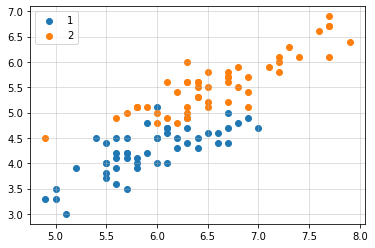

In [4]:
# グラフ化
x0 = df[['sepal_length', 'petal_length']][df['target'] == 1]
x1 = df[['sepal_length', 'petal_length']][df['target'] == 2]
plt.scatter(x0['sepal_length'], x0['petal_length'], label=1)
plt.scatter(x1['sepal_length'], x1['petal_length'], label=2)
plt.grid(True, alpha=.5)
plt.legend(loc='best')
plt.show()

In [5]:
# 計算結果確認用に別処理を用意
def test_calc(x, y, lam, lr=0.1):
    y = np.where(y == y.max(), 1, -1)
    new_lambda = np.zeros([x.shape[0],1])
    for i in range(x.shape[0]):
        sum_tmp = 0
        for j in range(x.shape[0]):
            karnel = x[i:i+1,:] @ x[j:j+1, :].T
            tmp = y[i] * y[j] * karnel
            tmp2 = lam[j] * tmp
            sum_tmp += tmp2
        new_lambda[i] = lam[i] + lr * (1 - sum_tmp)
    print('new_lambda :',new_lambda)

### for文での計算結果

In [6]:
np.random.seed(0)
test_calc(x, y, np.random.rand(x.shape[0])[:, np.newaxis])

new_lambda : [[-17.43507414]
 [-15.74724746]
 [-17.16044204]
 [-13.60718349]
 [-16.30175514]
 [-14.07440966]
 [-15.80416738]
 [-11.66835805]
 [-16.01062332]
 [-13.00789974]
 [-12.04547608]
 [-14.64687027]
 [-14.82840286]
 [-14.81840566]
 [-14.27351892]
 [-17.10783901]
 [-14.45120923]
 [-14.08017224]
 [-15.18652777]
 [-13.51683371]
 [-14.28172862]
 [-14.84616501]
 [-15.80846916]
 [-14.96347312]
 [-16.31596848]
 [-16.30617114]
 [-17.35687902]
 [-16.33488116]
 [-14.9450839 ]
 [-14.16467223]
 [-13.85931714]
 [-13.3355421 ]
 [-14.42844783]
 [-14.98308004]
 [-13.95488553]
 [-14.84929673]
 [-16.62516347]
 [-15.58252972]
 [-13.4712917 ]
 [-13.47024637]
 [-13.84894661]
 [-15.29287338]
 [-14.20106393]
 [-12.74878173]
 [-13.76237003]
 [-14.00737502]
 [-14.46763033]
 [-15.80756431]
 [-12.70016411]
 [-14.30020516]
 [ 17.19521186]
 [ 15.6923632 ]
 [ 19.59030116]
 [ 16.67067205]
 [ 17.30345022]
 [ 20.10629632]
 [ 13.5824029 ]
 [ 19.40935907]
 [ 18.05863654]
 [ 19.12342299]
 [ 17.15486432]
 [ 16.88558

### 行列計算での計算結果
for文と一致しているため、計算結果にある程度信憑性ありそう。

※負の値を0に置換していますが、置換前の値もfor文と一致していることを確認済みです。

In [7]:
svm01 = ScratchSVMClassifier(num_iter=1, lr=0.1, kernel='linear', threshold=1e-5, verbose=False, q=[1])
svm01.fit(x, y)

[INFO] Loop count : 0
[INFO] new_lambda : [[ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [17.19521186]
 [15.6923632 ]
 [19.59030116]
 [16.67067205]
 [17.30345022]
 [20.10629632]
 [13.5824029 ]
 [19.40935907]
 [18.05863654]
 [19.12342299]
 [17.15486432]
 [16.88558765]
 [18.45524062]
 [15.12897153

## 【問題2】サポートベクターの決定
計算したラグランジュ乗数 
λ
 が設定した閾値より大きいサンプルをサポートベクターとして扱います。推定時にサポートベクターが必要になります。サポートベクターを決定し、インスタンス変数として保持しておくコードを書いてください。


閾値はハイパーパラメータですが、1e-5程度からはじめると良いでしょう。サポートベクターの数を出力させられるようにしておくと学習がうまく行えているかを確認できます。



In [8]:
svm02 = ScratchSVMClassifier(num_iter=100, lr=1e-4, kernel='linear', threshold=1e-5, verbose=False, q=[2])
svm02.fit(x, y)

[INFO] Loop count : 0
[INFO] support_vector_num : 100
[INFO] Loop count : 1
[INFO] support_vector_num : 100
[INFO] Loop count : 2
[INFO] support_vector_num : 98
[INFO] Loop count : 3
[INFO] support_vector_num : 98
[INFO] Loop count : 4
[INFO] support_vector_num : 99
[INFO] Loop count : 5
[INFO] support_vector_num : 100
[INFO] Loop count : 6
[INFO] support_vector_num : 100
[INFO] Loop count : 7
[INFO] support_vector_num : 100
[INFO] Loop count : 8
[INFO] support_vector_num : 100
[INFO] Loop count : 9
[INFO] support_vector_num : 100
[INFO] Loop count : 10
[INFO] support_vector_num : 100
[INFO] Loop count : 11
[INFO] support_vector_num : 100
[INFO] Loop count : 12
[INFO] support_vector_num : 100
[INFO] Loop count : 13
[INFO] support_vector_num : 100
[INFO] Loop count : 14
[INFO] support_vector_num : 100
[INFO] Loop count : 15
[INFO] support_vector_num : 100
[INFO] Loop count : 16
[INFO] support_vector_num : 100
[INFO] Loop count : 17
[INFO] support_vector_num : 100
[INFO] Loop count : 18


## 【問題3】推定
推定時には、推定したいデータの特徴量とサポートベクターの特徴量をカーネル関数によって計算します。求めた $f_{(x)}$ の符号が分類結果です。
 
$$
  f_{(x)}
  = \sum_{n=1}^{N}\lambda_ny_{sv_n}k(x,s_n)
$$

$x$ : 推定したいデータの特徴量ベクトル

$N$ : サポートベクターの数

$n$ : サポートベクターのインデックス

$\lambda_n$ : n番目のサポートベクターのラグランジュ乗数

$y_{sv_n}$ : n番目のサポートベクターのラベル

$k_{()}$ : カーネル関数

$s_n$ : n番目のサポートベクターの特徴量

In [9]:
svm03 = ScratchSVMClassifier(num_iter=10000, lr=1e-4, kernel='linear', threshold=1e-5, verbose=False, q=[3])
svm03.fit(x, y)
y_pred03 = svm03.predict(x)
y_pred03

array([1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2])

## 【問題4】学習と推定
機械学習スクラッチ入門のSprintで用意したシンプルデータセット1の2値分類に対してスクラッチ実装の学習と推定を行なってください。

scikit-learnによる実装と比べ、正しく動いているかを確認してください。

AccuracyやPrecision、Recallなどの指標値はscikit-learnを使用してください。

In [10]:
# 混同行列
def cf_matrix(data):
    plt.figure(figsize=(5, 3))
    sns.heatmap(data, cmap='Pastel1', cbar=False, annot_kws={"size": 22}, annot=True, fmt="d", linewidths=1)
    plt.title("Confusion-matrix", fontsize=14)
    plt.xlabel("Predicted value", fontsize=12)
    plt.ylabel("Observed value", fontsize=12)
    plt.show()

In [11]:
# シンプルデータセット1
np.random.seed(0)
n_samples = 500
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]
f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))
X = np.concatenate((f0, f1))
Y = np.concatenate((np.ones((int(n_samples/2))), np.ones((int(n_samples/2))) *(-1))).astype(np.int)
random_index = np.random.permutation(np.arange(n_samples))
X1 = X[random_index]
y1 = Y[random_index][:, np.newaxis]

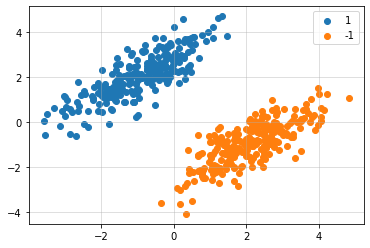

In [12]:
# グラフ化
index_a = np.where(y1 == 1)
index_b = np.where(y1 == -1)
plt.scatter(X1[index_a, 0], X1[index_a, 1], label=1)
plt.scatter(X1[index_b, 0], X1[index_b, 1], label=-1)
plt.grid(True, alpha=.5)
plt.legend(loc='best')
plt.show()

In [13]:
# データ分割
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=0)

### scikit-learnで実行

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
[-1  1  1 -1 -1  1  1 -1 -1  1 -1  1 -1 -1 -1  1  1  1  1  1 -1 -1  1  1
 -1  1  1  1  1 -1 -1  1  1 -1  1 -1  1 -1 -1  1 -1  1 -1  1 -1  1 -1  1
 -1  1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1 -1  1 -1 -1 -1 -1  1  1  1
  1  1  1 -1  1 -1  1 -1  1  1  1  1  1 -1 -1  1  1  1 -1  1 -1  1 -1  1
  1  1 -1  1 -1  1  1  1 -1  1 -1  1  1  1  1 -1  1 -1  1 -1  1  1 -1  1
  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1  1  1 -1 -1 -1 -1  1  1  1  1
 -1  1 -1  1  1  1]
正解率：1.0


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


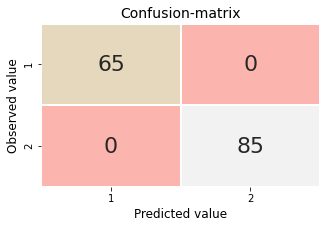

              precision    recall  f1-score   support

          X1       1.00      1.00      1.00        65
          X2       1.00      1.00      1.00        85

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



In [14]:
# インスタンス生成・学習
model02 = SVC()
model02.fit(X_train, y_train)
print(model02)

# 予測
y_pred_sk = model02.predict(X_test)
print(y_pred_sk)

# score
print('正解率：{}'.format(metrics.accuracy_score(y_test, y_pred_sk)))

# 混同行列
confusion = metrics.confusion_matrix(y_test, y_pred_sk)
cf_df = pd.DataFrame(confusion, index=[1,2], columns=[1,2])
cf_matrix(cf_df)

# 評価指標
target_names = ['X1', 'X2']
a = metrics.classification_report(y_test, y_pred_sk, target_names=target_names)
print(a)

### スクラッチで実行

In [15]:
svm04_2 = ScratchSVMClassifier(num_iter=1000, lr=1e-4, kernel='linear', threshold=1e-5, verbose=False, q=[3])
svm04_2.fit(X_train, y_train)
y_pred04_2 = svm04_2.predict(X_test)
y_pred04_2

array([-1,  1,  1, -1, -1,  1,  1, -1, -1,  1, -1,  1, -1, -1, -1,  1,  1,
        1,  1,  1, -1, -1,  1,  1, -1,  1,  1,  1,  1, -1, -1,  1,  1, -1,
        1, -1,  1, -1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,
       -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1, -1, -1,
       -1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1, -1,  1,  1,  1,  1,  1,
       -1, -1,  1,  1,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1, -1,  1,
        1,  1, -1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1, -1,  1,  1, -1,
        1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1,  1,
       -1, -1, -1, -1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1])

正解率：1.0


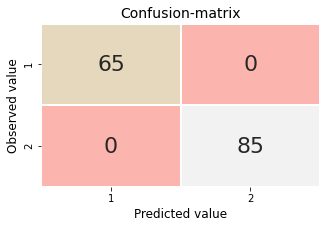

              precision    recall  f1-score   support

          X1       1.00      1.00      1.00        65
          X2       1.00      1.00      1.00        85

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



In [16]:
# score
print('正解率：{}'.format(metrics.accuracy_score(y_test, y_pred04_2)))

# 混同行列
confusion = metrics.confusion_matrix(y_test, y_pred04_2)
cf_df = pd.DataFrame(confusion, index=[1,2], columns=[1,2])
cf_matrix(cf_df)

# 評価指標
target_names = ['X1', 'X2']
a = metrics.classification_report(y_test, y_pred04_2, target_names=target_names)
print(a)

## 【問題4 追加】せっかくなのでアイリスデータにも実行

In [17]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

### scikit-learnで実行

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
[1 2 1 2 2 2 1 2 2 2 2 2 2 1 1 1 2 1 2 1 1 2 1 2 1]
正解率：0.92


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


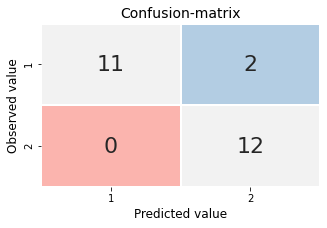

              precision    recall  f1-score   support

  virgicolor       1.00      0.85      0.92        13
   virginica       0.86      1.00      0.92        12

    accuracy                           0.92        25
   macro avg       0.93      0.92      0.92        25
weighted avg       0.93      0.92      0.92        25



In [18]:
# インスタンス生成・学習
model01 = SVC()
model01.fit(X_train, y_train)
print(model01)

# 予測
y_pred_sk = model01.predict(X_test)
print(y_pred_sk)

# score
print('正解率：{}'.format(metrics.accuracy_score(y_test, y_pred_sk)))

# 混同行列
confusion = metrics.confusion_matrix(y_test, y_pred_sk)
cf_df = pd.DataFrame(confusion, index=[1,2], columns=[1,2])
cf_matrix(cf_df)

# 評価指標
target_names = ['virgicolor', 'virginica']
a = metrics.classification_report(y_test, y_pred_sk, target_names=target_names)
print(a)

### スクラッチで実行

In [19]:
svm04 = ScratchSVMClassifier(num_iter=100000, lr=1e-4, kernel='linear', threshold=1e-5, verbose=False, q=[3])
svm04.fit(X_train, y_train)
y_pred04 = svm04.predict(X_test)
y_pred04

array([1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2,
       1, 2, 1])

正解率：0.84


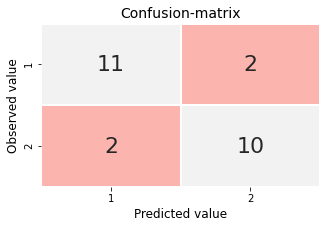

              precision    recall  f1-score   support

  virgicolor       0.85      0.85      0.85        13
   virginica       0.83      0.83      0.83        12

    accuracy                           0.84        25
   macro avg       0.84      0.84      0.84        25
weighted avg       0.84      0.84      0.84        25



In [20]:
# score
print('正解率：{}'.format(metrics.accuracy_score(y_test, y_pred04)))

# 混同行列
confusion = metrics.confusion_matrix(y_test, y_pred04)
cf_df = pd.DataFrame(confusion, index=[1,2], columns=[1,2])
cf_matrix(cf_df)

# 評価指標
target_names = ['virgicolor', 'virginica']
a = metrics.classification_report(y_test, y_pred04, target_names=target_names)
print(a)

## 【問題5】決定領域の可視化
決定領域を可視化してください。


以下の例のようにサポートベクターは異なる色で示してください。



In [21]:
def decision_region(X, y, model, step=0.01, title='decision region', 
                    xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'],
                    n_class=2):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """

    # setting
    if n_class == 2:
        scatter_color = ['red', 'blue']
        contourf_color = ['pink', 'skyblue']
    elif n_class == 3:
        scatter_color = ['green', 'red', 'blue']
        contourf_color = ['lightgreen', 'pink', 'skyblue']

    # pred
    mesh_f0, mesh_f1 = np.meshgrid(np.arange(np.min(X[:,0])-0.5, 
                                             np.max(X[:,0])+0.5, step), 
                                   np.arange(np.min(X[:,1])-0.5, 
                                             np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    y = np.squeeze(y)  # 2020-08-10 追加
    for i, target in enumerate(set(list(y))):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.scatter(model.support_vector[:, 0], model.support_vector[:, 1], s=50, color='yellow', marker='o', alpha=.6, label='support vector')
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

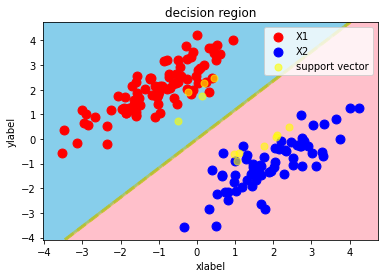

In [22]:
# データ再取得
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=0)
decision_region(X_test, y_test, svm04_2, target_names=['X1', 'X2'])

## 4.SVMとはどのような仕組みか

スクラッチ実装に必要な情報は以上ですが、大まかな仕組みの解説を行います。


SVMは決定境界と近くの点の距離（マージン）を最大化する方法です。特徴量が2つであれば以下の図のように線を引くことを考えます。

<img src="../img/1.png"></img>

決定境界は線形であれば、線形回帰やロジスティック回帰と同様に次の式です。

$$
  y_{(x)}
  = w^Tx
$$

x
 : 特徴量ベクトル


w
 : 重みベクトル

決定境界とある点 
x
 との距離 
r
 は以下の式で求められます。高校数学で学ぶ「点と直線の距離の公式」や「点と平面の距離の公式」を一般化したものです。
 
$$
  r
  = \frac{y_iy(x)}{\parallel w \parallel}
  = \frac{y_iw^Tx}{\parallel w \parallel}
$$

$\parallel w \parallel$ はベクトル $w$ の大きさで、特徴量が2つならば $\parallel w \parallel = \sqrt{w_1^2 + w_2^2}$ です。

また、学習するi番目のデータのラベルを $y_i = -1$ または $y_i = -1$ としています。


訓練データの中で「最も距離 $r$ が短くなる点$x$（サポートベクター）の距離 $r$ を最大化する $w$を求める」ことがSVMによる分類だと言い換えられます。

これは非常に複雑な問題です。 $w$ を変化させると、最も距離 $r$が短くなる点$x$（サポートベクター）も変化していくからです。

計算するためには、問題を扱いやすい形に変形させる必要があります。

### 扱いやすい形にする
まず定数 $M(>0)$ を置くと、先ほどの問題は、

「$\frac{M}{\parallel w \parallel}$ を $y_i(w^T x_i) \geq M$ という条件の元で最大化する $w$ や $M$ を求める問題」

と表現できます。条件式は $x_i$ に訓練データの全ての点を入れて成り立つ必要があります。まだまだややこしいですが、これをMで割ってしまいます。そうすると、

「$\frac{1}{\parallel w \parallel}$ を $y_i(\frac{w^T}{M} x_i) \geq 1$ という条件の元で最大化する $w$ や $M$ を求める問題」


になり、さらに $x^T \leftarrow \frac{w^T}{M}$ と置き換えてしまいます。

そうすれば、

「$\frac{1}{\parallel w \parallel}$ を $y_i(w^T X_i) \geq 1$ という条件の元で最大化する $w$ を求める問題」

まで簡単化できます。 
$\frac{1}{\parallel w \parallel}$ を最大化するというのは
$\parallel w \parallel$ を最小化することと同じです。

これを後々さらに扱いやすくするために 
$\frac{1}{2}\parallel w \parallel ^2$
を最小化すると考えます。よって、


「$\frac{1}{2}\parallel w \parallel ^2$ を $y_i(w^T X_i) \geq 1$ という条件の元で最大化する $w$ を求める問題」

とすることができます。

### 解きやすい問題にする（双対化）
こういった不等式制約を持つ最適化問題は次のように **ラグランジュの未定乗数法** で置き換えられることが知られています。

なお、このように難しい問題を別の簡単な問題に言い換えることを **双対化する** といいます。

ラグランジュの未定乗数法を用いると以下のラグランジュ関数が得られます。

$$
  L(w,\lambda)
  = \frac{1}{2}\parallel w \parallel ^2 - \sum_{i=1}^{N}\lambda_i{y_i (w^T x_i)-1}
$$

$\lambda$ はラグランジュ乗数と呼ばれる数で、0以上の値です。これを 
$w$について微分し、0に等しいと置くと、次の式が得られます。

$$
  w = \sum_{i=1}^{N}\lambda_iy_ix_i
$$

（この微分のために $\parallel w \parallel$ ではなく $\frac{1}{2}\parallel w \parallel^2$ としています）

これをラグランジュ関数に代入して整理すると

$$
  \sum_{i=1}^{N}\lambda_i - \frac{1}{2}\sum_{i=1}^{N}\sum_{j=1}^{N}\lambda_i \lambda_j y_i y_j x_i^T x_j
$$

を $\lambda_i \geq 0$ かつ $sum_{n=1}^{N}\lambda_i y_i = 0$ の条件の元で最大化するときの $\lambda_i$ を探す問題に双対化できます。

この形になれば、$\lambda$ を勾配降下法により求めることができます。
$w$ は出てきませんが、得られる結果は同じです。

### カーネル
最後の式の $x_i^T x_i$ の部分を $k(x_i, x_j)$ という関数に置き換えます。この関数を カーネル関数 と呼びます。

$$
  \sum_{i=1}^{N}\lambda_i - \frac{1}{2}\sum_{i=1}^{N}\sum_{j=1}^{N}\lambda_i \lambda_j y_i y_j k(x_i^T, x_j)
$$

この式が問題1の最急降下法の式の元になります。

カーネル関数は 
$x_i^T x_i$ ではない様々な計算に置き換えることができます。この部分を置き換えるだけで、元の特徴量を 高次元空間 に移動させたことと同じ結果が得られ、高い分類性能を得ることができます。これを カーネルトリック と呼びます。

### 高次元へ移す簡単な例
次の図のように1次元上に2色の点があるとします。これらを直線一本を引くことで分けることは不可能です。

<img src="../img/2.png"></img>

しかし、例えば以下のように変換してみると直線でも分けられそうです。
$x^2 = 2.5$
 あたりに線を引くことになります。

<img src="../img/3.png"></img>


これは $x^2$ を計算し、それを縦軸にプロットしたグラフです。1次元だったデータを 
$\phi (x) = x^2$ の関数により高次元（2次元）へと移動しました。

こういったことをSVMはカーネルトリックにより行います。

## 5.他のカーネル関数の実装

## 【問題6】（アドバンス課題）多項式カーネル関数の作成
最初に作成した実装では線形カーネルを使用していました。多項式カーネルにも切り替えられるようにしましょう。

「線形カーネルの式」

$$
  k(x_i, x_j) = x_i^Tx_j
$$

「多項式カーネルの式」

$$
  k(x_i, x_j)
  = (\gamma x_i^Tx_j + \theta_0)^d
$$

$\gamma, \theta_0, d$ はハイパーパラメータです。


線形カーネルは $\gamma = 1, \theta_0 = 0, d = 1$ の場合の多項式カーネルと等しいと言えます。

### kernel='polly'　かつ　デフォルト（$\gamma = 1, \theta_0 = 0, d = 1$）で実行

In [23]:
# デフォルトで実行（テスト用：線形カーネルと同じ結果になることを確認する）
svm05 = ScratchSVMClassifier(num_iter=1001, lr=1e-4, kernel='polly', threshold=1e-5, verbose=True, q=[3], verbose_filter=100)
svm05.fit(X_train, y_train)
y_pred05 = svm05.predict(X_test)
y_pred05

Loop count : 0 
 Support vector num: 321
Loop count : 100 
 Support vector num: 40
Loop count : 200 
 Support vector num: 23
Loop count : 300 
 Support vector num: 22
Loop count : 400 
 Support vector num: 17
Loop count : 500 
 Support vector num: 14
Loop count : 600 
 Support vector num: 13
Loop count : 700 
 Support vector num: 13
Loop count : 800 
 Support vector num: 13
Loop count : 900 
 Support vector num: 11
Loop count : 1000 
 Support vector num: 12


array([-1,  1,  1, -1, -1,  1,  1, -1, -1,  1, -1,  1, -1, -1, -1,  1,  1,
        1,  1,  1, -1, -1,  1,  1, -1,  1,  1,  1,  1, -1, -1,  1,  1, -1,
        1, -1,  1, -1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,
       -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1, -1, -1,
       -1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1, -1,  1,  1,  1,  1,  1,
       -1, -1,  1,  1,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1, -1,  1,
        1,  1, -1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1, -1,  1,  1, -1,
        1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1,  1,
       -1, -1, -1, -1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1])

In [24]:
# 上記のサポートベクター
svm05.support_vector

array([[ 2.0789714 ,  0.06069619],
       [ 1.10298263, -0.54852515],
       [ 0.17960016,  2.27026099],
       [ 1.03842491, -0.88881567],
       [ 0.43738711,  2.46038808],
       [ 2.42340322,  0.48692572],
       [-0.50179779,  0.74466058],
       [ 1.74948383, -0.29028349],
       [ 0.9829958 , -0.6091934 ],
       [ 2.10157755,  0.16531826],
       [-0.22937411,  1.90103034],
       [ 0.14096048,  1.74864676]])

In [25]:
# 問題4で実行済みのサポートベクター
svm04_2.support_vector

array([[ 2.0789714 ,  0.06069619],
       [ 1.10298263, -0.54852515],
       [ 0.17960016,  2.27026099],
       [ 1.03842491, -0.88881567],
       [ 0.43738711,  2.46038808],
       [ 2.42340322,  0.48692572],
       [-0.50179779,  0.74466058],
       [ 1.74948383, -0.29028349],
       [ 0.9829958 , -0.6091934 ],
       [ 2.10157755,  0.16531826],
       [-0.22937411,  1.90103034],
       [ 0.14096048,  1.74864676]])

### パラメータの値を変更して実行

In [26]:
svm05 = ScratchSVMClassifier(num_iter=1001, lr=1e-4, kernel='polly', threshold=1e-5, verbose=True, q=[3], verbose_filter=100,
                             params={'g': 1.5, 't':2.0, 'd':2.0})
svm05.fit(X_train, y_train)
y_pred05 = svm05.predict(X_test)
y_pred05

Loop count : 0 
 Support vector num: 114
Loop count : 100 
 Support vector num: 10
Loop count : 200 
 Support vector num: 8
Loop count : 300 
 Support vector num: 8
Loop count : 400 
 Support vector num: 11
Loop count : 500 
 Support vector num: 7
Loop count : 600 
 Support vector num: 9
Loop count : 700 
 Support vector num: 8
Loop count : 800 
 Support vector num: 9
Loop count : 900 
 Support vector num: 11
Loop count : 1000 
 Support vector num: 11


array([-1,  1,  1, -1, -1,  1,  1, -1, -1,  1, -1,  1, -1, -1, -1,  1,  1,
        1,  1,  1, -1, -1,  1,  1, -1,  1,  1,  1,  1, -1, -1,  1,  1, -1,
        1, -1,  1, -1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,
       -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1, -1, -1,
       -1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1, -1,  1,  1,  1,  1,  1,
       -1, -1,  1,  1,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1, -1,  1,
        1,  1, -1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1, -1,  1,  1, -1,
        1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1,  1,
       -1, -1, -1, -1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1])

In [27]:
svm05.support_vector

array([[ 1.10298263, -0.54852515],
       [ 0.10605669, -2.92214793],
       [ 0.46861035,  2.21584467],
       [ 1.03842491, -0.88881567],
       [-0.50179779,  0.74466058],
       [ 1.28107479, -0.21320964],
       [ 0.9829958 , -0.6091934 ],
       [-0.97854994,  0.34188908],
       [-1.02829008,  0.23898594],
       [-1.69044419,  0.52858339],
       [ 0.14096048,  1.74864676]])

正解率：1.0


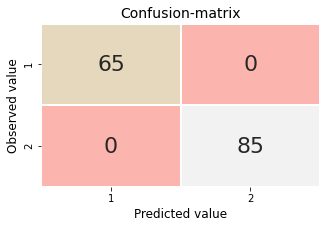

              precision    recall  f1-score   support

          X1       1.00      1.00      1.00        65
          X2       1.00      1.00      1.00        85

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



In [28]:
# score
print('正解率：{}'.format(metrics.accuracy_score(y_test, y_pred05)))

# 混同行列
confusion = metrics.confusion_matrix(y_test, y_pred05)
cf_df = pd.DataFrame(confusion, index=[1,2], columns=[1,2])
cf_matrix(cf_df)

# 評価指標
target_names = ['X1', 'X2']
a = metrics.classification_report(y_test, y_pred05, target_names=target_names)
print(a)